In [8]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

Xác suất ra về tay trắng: 0.8
Xác suất ra về với 100$: 0.2


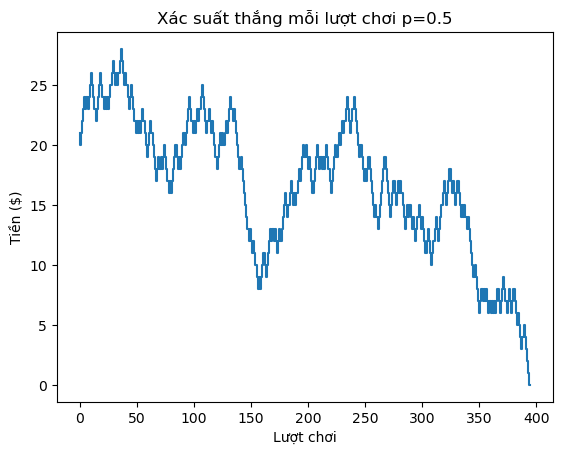

Số tiền kì vọng đạt được sau khi chơi: 20.0$


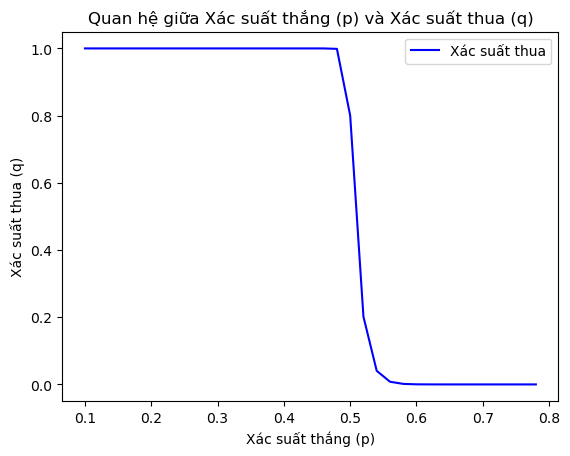

In [8]:
import scipy as sp
import matplotlib.pyplot as plt
import numpy as np

class PlayCards:
    def __init__(self, p, i, T, target):
        self.p = p
        self.money = i
        self.play_count = T
        self.target = target
        self.result = self.game()
    
    def game(self):
        l = []
        x = self.money
        for i in np.arange(self.play_count):
            b = 2 * sp.stats.bernoulli.rvs(self.p) - 1
            x = x + b
            l.append(x)
            if x == 0 or i == (self.play_count - 1) or x == self.target :
                break
        return l
    def probability_reach_N(self):
        I = self.money
        N = self.target
        p = self.p
        
        if p == 0.5:
            return I / N
        else:
            q = 1 - p
            return (1 - (q / p) ** I) / (1 - (q / p) ** N)

    def probability_go_broke(self):
        return 1 - self.probability_reach_N()

    def plot(self):
        # Vẽ kết quả mô phỏng
        plt.step(np.arange(len(self.result)), self.result, label='Mô phỏng')
        plt.xlabel('Lượt chơi')
        plt.ylabel('Tiền ($)')
        plt.title(f'Xác suất thắng mỗi lượt chơi p={self.p}')
        plt.show()

    def lose(self):
        a=[]
        b= []
        
        for p in np.arange(0.1,0.8,0.02):
            q=1-p
            a.append(p)
            prob_lose= 1- (1 - (q / p) ** self.money) / (1 - (q / p) ** self.target)
            b.append(prob_lose)
        return a,b

    

    def expected_value(self):
        # E[luot choi] = 1*p - (1-p)= 2p-1
        expected_value = self.money + (2 * self.p - 1) * len(self.result)
        print(f"Số tiền kì vọng đạt được sau khi chơi: {expected_value}$")




# xác suất thắng mỗi lượt chơi
p=0.5
# tiền vốn ban đầu
i=20
# Số lượt chơi đã đề ra trước
T=1000
# Mục tiêu
target=100
p_1 = PlayCards(p,i,T,target)

print( f"Xác suất ra về tay trắng: {round(p_1.probability_go_broke(),3)}")
print(f"Xác suất ra về với {target}$: {round(p_1.probability_reach_N(),3)}")
p_1.plot()


p,q=p_1.lose()

# ki vong
p_1.expected_value()

plt.plot(p, q, label='Xác suất thua', color='blue')

plt.xlabel('Xác suất thắng (p)')
plt.ylabel('Xác suất thua (q)')
plt.title('Quan hệ giữa Xác suất thắng (p) và Xác suất thua (q)')
plt.legend()
plt.show()
